In [1]:
import pickle as pickle
from pprint import pprint
import pandas as pd
import re
from matplotlib import pyplot as plt
import os
import json
import numpy as np
from present import *


pd.set_option('display.max_colwidth', None)
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

/Users/duxiang/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


## Compare LDA Models

### LDA k = 5 keep NER without abstract

In [7]:
# Load Model
with open("../data/saved_results/model/lda_k=5.pickle", "rb") as fp:
    lda_5 = pickle.load(fp)
    
# datawords
with open("../data/saved_results/data_words/ner=20210205_q=0.005.pickle", "rb") as fp:
    data_word = pickle.load(fp)

# load corpus
with open("../data/saved_results/corpus/ner=20210205_q=0.005_corpus.pickle", "rb") as fp:
    corpus_ner = pickle.load(fp)

In [8]:
topics_df(lda_5)

,Terms per Topic
Topic1,"circuit, input, network, output, behavior, gate, strand, simulation, device, module, algorithm, noise, distribution, population, degradation"
Topic2,"ion, membrane, residue, peptide, surface, affinity, fusion, secretion, light"
Topic3,"biosynthesis, titer, carbon, cluster, metabolite, fermentation, flux, deletion, biosynthetic, module, heterologous, compound, fatty, strains, cerevisiae, biomass, synthase, overexpression"
Topic4,"terminator, mrna, bp, GFP, repression, tRNA, cassette, rb, ribosome, strength, transformation, strains"
Topic5,"sensor, light, activation, ligand, GFP, switch, biosensor, riboswitch, receptor, mCherry, circuit, ed, intensity, output, supplementary, mammalian"


In [60]:
# coherence model w/o abstract c_v
with open("../data/saved_results/model/lda_k=5_coherence.pickle", "rb") as fp:
    coh_model_noabs = pickle.load(fp)
    
# coherence model w/o abstract u_mass
with open("../data/saved_results/model/lda_k=5_coherence_u_mass.pickle", "rb") as fp:
    coh_model_noabs_u_mass = pickle.load(fp)

        
# coherence model with abstract c_uci
with open("../data/saved_results/model/lda_k=5_coherence_c_uci.pickle", "rb") as fp:
    coh_model_noabs_c_uci = pickle.load(fp)
    
# coherence model with abstract c_npmi
with open("../data/saved_results/model/lda_k=5_coherence_c_npmi.pickle", "rb") as fp:
    coh_model_noabs_c_npmi = pickle.load(fp)

In [10]:
coh_model_noabs.get_coherence()

0.45293548917502635

In [73]:
coh_model_noabs_u_mass.get_coherence()

-2.0550132303026887

In [62]:
coh_model_noabs_c_uci.get_coherence()

-1.537921625616503

In [70]:
coh_model_noabs_c_npmi.get_coherence()

-0.026614252943589923

In [74]:
coh_model_noabs.get_coherence_per_topic()

[0.6269984749420805,
 0.45245765963706025,
 0.39659897524607696,
 0.3950725864301639,
 0.39354974961975026]

In [12]:
lda_5.print_topics()

[(0,
  '0.013*"circuit" + 0.007*"input" + 0.007*"network" + 0.006*"output" + 0.005*"behavior" + 0.005*"gate" + 0.004*"strand" + 0.004*"simulation" + 0.004*"device" + 0.004*"module"'),
 (1,
  '0.006*"°c" + 0.006*"ion" + 0.006*"membrane" + 0.005*"residue" + 0.005*"peptide" + 0.004*"surface" + 0.003*"affinity" + 0.003*"fusion" + 0.003*"secretion" + 0.003*"E."'),
 (2,
  '0.011*"E." + 0.007*"S." + 0.007*"°c" + 0.005*"biosynthesis" + 0.005*"titer" + 0.004*"carbon" + 0.004*"cluster" + 0.004*"metabolite" + 0.004*"fermentation" + 0.004*"flux"'),
 (3,
  '0.008*"°c" + 0.007*"E." + 0.005*"terminator" + 0.004*"mrna" + 0.004*"bp" + 0.004*"GFP" + 0.004*"repression" + 0.003*"tRNA" + 0.003*"cassette" + 0.003*"rb"'),
 (4,
  '0.006*"sensor" + 0.005*"light" + 0.005*"activation" + 0.005*"E." + 0.005*"ligand" + 0.005*"GFP" + 0.004*"switch" + 0.004*"biosensor" + 0.003*"riboswitch" + 0.003*"receptor"')]

### LDA k = 5 keep NER with abstract*** (Currently Using)

In [2]:
# Load Model
with open("../data/saved_results/model/lda_k=5_abstract.pickle", "rb") as fp:
    lda_5_abs = pickle.load(fp)

# load corpus
with open("../data/saved_results/corpus/ner=20210205_q=0.005_abstract_corpus.pickle", "rb") as fp:
    corpus_ner_abs = pickle.load(fp)

# load doc_lda
with open("../data/saved_results/corpus/lda_k=5_abstract_doc_lda.pickle", "rb") as fp:
    doc_lda_5_abs = pickle.load(fp)

# load article_sq
with open("../data/saved_results/data_words/article_sq.pickle", "rb") as fp:
    article_sq = pickle.load(fp)

In [6]:
topics_df(lda_5_abs)

,Terms per Topic
Topic1,"mrna, terminator, repression, GFP, strength, ribosome, rb, membrane, IPTG, strains, RBS, supplementary"
Topic2,"light, domain, activation, ligand, ion, fusion, switch, sensor, receptor, ed, GFP, mCherry, intensity, mammalian, membrane"
Topic3,"biosynthesis, titer, metabolite, carbon, fermentation, flux, compound, deletion, biosynthetic, biosensor, strains, fatty, heterologous, intracellular, recombinant, overexpression, supernatant, precursor"
Topic4,"circuit, network, output, input, behavior, gate, strand, device, simulation, module, algorithm, noise, distribution, degradation, population, logic, switch, domain"
Topic5,"yeast, cassette, tRNA, residue, bp, CRISPR, recombination, cluster, DNA, incorporation, transformation, ligation"


In [3]:
# coherence model with abstract
with open("../data/saved_results/model/lda_k=5_abstract_coherence.pickle", "rb") as fp:
    coh_model = pickle.load(fp)

# coherence model with abstract u_mass
with open("../data/saved_results/model/lda_k=5_abstract_coherence_u_mass.pickle", "rb") as fp:
    coh_model_u_mass = pickle.load(fp)
    
# coherence model with abstract c_uci
with open("../data/saved_results/model/lda_k=5_abstract_coherence_u_uci.pickle", "rb") as fp:
    coh_model_c_uci = pickle.load(fp)
    
# coherence model with abstract c_npmi
with open("../data/saved_results/model/lda_k=5_abstract_coherence_c_npmi.pickle", "rb") as fp:
    coh_model_c_npmi = pickle.load(fp)

In [64]:
coh_model.get_coherence()

0.4248681962241365

In [65]:
coh_model_u_mass.get_coherence()

-1.7888344163719747

In [66]:
coh_model_c_uci.get_coherence()

-1.4579601172647627

In [69]:
coh_model_c_npmi.get_coherence()

-0.029441572987801822

In [68]:
coh_model.get_coherence_per_topic()

[0.3538224860698257,
 0.37135698736951,
 0.4251240767457071,
 0.5983410490018366,
 0.37569638193380284]

In [18]:
lda_5_abs.print_topics()

[(0,
  '0.007*"E." + 0.006*"°c" + 0.006*"mrna" + 0.005*"terminator" + 0.005*"repression" + 0.005*"GFP" + 0.004*"strength" + 0.003*"ribosome" + 0.003*"rb" + 0.003*"membrane"'),
 (1,
  '0.007*"light" + 0.007*"domain" + 0.005*"activation" + 0.005*"ligand" + 0.004*"ion" + 0.004*"fusion" + 0.004*"°c" + 0.004*"switch" + 0.004*"sensor" + 0.003*"receptor"'),
 (2,
  '0.013*"E." + 0.007*"°c" + 0.005*"S." + 0.005*"biosynthesis" + 0.004*"titer" + 0.004*"metabolite" + 0.004*"carbon" + 0.004*"fermentation" + 0.004*"flux" + 0.004*"compound"'),
 (3,
  '0.015*"circuit" + 0.007*"network" + 0.007*"output" + 0.007*"input" + 0.005*"behavior" + 0.005*"gate" + 0.004*"strand" + 0.004*"device" + 0.004*"simulation" + 0.004*"module"'),
 (4,
  '0.007*"yeast" + 0.007*"°c" + 0.004*"cassette" + 0.004*"tRNA" + 0.004*"residue" + 0.003*"bp" + 0.003*"CRISPR" + 0.003*"recombination" + 0.003*"cluster" + 0.003*"E."')]

In [19]:
doc_lda_5_abs

[[(0, 0.34567901234567905),
  (1, 0.10789049919484703),
  (2, 0.3332566520972319),
  (3, 0.16455793267387472),
  (4, 0.04861590368836746)],
 [(0, 0.2620721987810595),
  (1, 0.03234880450070323),
  (2, 0.01915477864844953),
  (3, 0.6599022168642421),
  (4, 0.026522001205545504)],
 [(0, 0.7624306527712965),
  (1, 0.09571213770933787),
  (2, 0.06175143879296934),
  (3, 0.032975579405817385),
  (4, 0.047130191320578614)],
 [(0, 0.020822397200349955),
  (1, 0.023272090988626423),
  (2, 0.931350247885681),
  (3, 0.014756488772236804),
  (4, 0.009798775153105862)],
 [(0, 0.03267195767195767),
  (1, 0.5948853615520282),
  (2, 0.014109347442680775),
  (3, 0.136331569664903),
  (4, 0.22200176366843033)],
 [(0, 0.048171966178397044),
  (1, 0.03924020483506014),
  (2, 0.18065975943789447),
  (3, 0.12355603191616053),
  (4, 0.6083720376324878)],
 [(0, 0.04344418318217445),
  (1, 0.8630239241592954),
  (2, 0.012018064419811146),
  (3, 0.05617138804911732),
  (4, 0.025342440189601766)],
 [(0, 0.01630

In [20]:
[[i[1] for i in j] for j in doc_lda_5_abs]

[[0.34567901234567905,
  0.10789049919484703,
  0.3332566520972319,
  0.16455793267387472,
  0.04861590368836746],
 [0.2620721987810595,
  0.03234880450070323,
  0.01915477864844953,
  0.6599022168642421,
  0.026522001205545504],
 [0.7624306527712965,
  0.09571213770933787,
  0.06175143879296934,
  0.032975579405817385,
  0.047130191320578614],
 [0.020822397200349955,
  0.023272090988626423,
  0.931350247885681,
  0.014756488772236804,
  0.009798775153105862],
 [0.03267195767195767,
  0.5948853615520282,
  0.014109347442680775,
  0.136331569664903,
  0.22200176366843033],
 [0.048171966178397044,
  0.03924020483506014,
  0.18065975943789447,
  0.12355603191616053,
  0.6083720376324878],
 [0.04344418318217445,
  0.8630239241592954,
  0.012018064419811146,
  0.05617138804911732,
  0.025342440189601766],
 [0.016300845369422647,
  0.6474089237651162,
  0.009818416164373176,
  0.026043443648356646,
  0.30042837105273135],
 [0.0558859624280185,
  0.02152364769187199,
  0.022373265363919568,
 

In [5]:
doc_lda = []
for r in doc_lda_5_abs:
    temp = []
    for i in range(len(r)):
        temp.append(r[i][1])
    doc_lda.append(temp)
doc_lda

[[0.34567901234567905,
  0.10789049919484703,
  0.3332566520972319,
  0.16455793267387472,
  0.04861590368836746],
 [0.2620721987810595,
  0.03234880450070323,
  0.01915477864844953,
  0.6599022168642421,
  0.026522001205545504],
 [0.7624306527712965,
  0.09571213770933787,
  0.06175143879296934,
  0.032975579405817385,
  0.047130191320578614],
 [0.020822397200349955,
  0.023272090988626423,
  0.931350247885681,
  0.014756488772236804,
  0.009798775153105862],
 [0.03267195767195767,
  0.5948853615520282,
  0.014109347442680775,
  0.136331569664903,
  0.22200176366843033],
 [0.048171966178397044,
  0.03924020483506014,
  0.18065975943789447,
  0.12355603191616053,
  0.6083720376324878],
 [0.04344418318217445,
  0.8630239241592954,
  0.012018064419811146,
  0.05617138804911732,
  0.025342440189601766],
 [0.016300845369422647,
  0.6474089237651162,
  0.009818416164373176,
  0.026043443648356646,
  0.30042837105273135],
 [0.0558859624280185,
  0.02152364769187199,
  0.022373265363919568,
 

In [6]:
doc_lda_m = [list(zip(d,['gene expression', 'biosensors', 'metabolic engineering', 'genetic circuit design', 'strain construction'])) for d in doc_lda]

In [7]:
topic_distribution_file = dict(zip(article_sq, doc_lda_m))
topic_distribution_file

{'sb9b00393': [(0.34567901234567905, 'gene expression'),
  (0.10789049919484703, 'biosensors'),
  (0.3332566520972319, 'metabolic engineering'),
  (0.16455793267387472, 'genetic circuit design'),
  (0.04861590368836746, 'strain construction')],
 'sb6b00301': [(0.2620721987810595, 'gene expression'),
  (0.03234880450070323, 'biosensors'),
  (0.01915477864844953, 'metabolic engineering'),
  (0.6599022168642421, 'genetic circuit design'),
  (0.026522001205545504, 'strain construction')],
 'sb7b00200': [(0.7624306527712965, 'gene expression'),
  (0.09571213770933787, 'biosensors'),
  (0.06175143879296934, 'metabolic engineering'),
  (0.032975579405817385, 'genetic circuit design'),
  (0.047130191320578614, 'strain construction')],
 'sb7b00129': [(0.020822397200349955, 'gene expression'),
  (0.023272090988626423, 'biosensors'),
  (0.931350247885681, 'metabolic engineering'),
  (0.014756488772236804, 'genetic circuit design'),
  (0.009798775153105862, 'strain construction')],
 'sb6b00028': [

In [8]:
list_of_jsons = os.listdir('../data/json-files/')

In [18]:
with open('./sb5b00001.json', 'r') as f:
    d = json.load(f)
    d['topic_modeling'] = topic_distribution_file['sb9b00393']

with open('./sb5b00001.json', 'w') as f:
    json.dump(d, f, indent = 5)

In [32]:
for file in list_of_jsons:
    with open('../data/json-files/')

{'sb9b00393': [(0, 0.34567901234567905),
  (1, 0.10789049919484703),
  (2, 0.3332566520972319),
  (3, 0.16455793267387472),
  (4, 0.04861590368836746)],
 'sb6b00301': [(0, 0.2620721987810595),
  (1, 0.03234880450070323),
  (2, 0.01915477864844953),
  (3, 0.6599022168642421),
  (4, 0.026522001205545504)],
 'sb7b00200': [(0, 0.7624306527712965),
  (1, 0.09571213770933787),
  (2, 0.06175143879296934),
  (3, 0.032975579405817385),
  (4, 0.047130191320578614)],
 'sb7b00129': [(0, 0.020822397200349955),
  (1, 0.023272090988626423),
  (2, 0.931350247885681),
  (3, 0.014756488772236804),
  (4, 0.009798775153105862)],
 'sb6b00028': [(0, 0.03267195767195767),
  (1, 0.5948853615520282),
  (2, 0.014109347442680775),
  (3, 0.136331569664903),
  (4, 0.22200176366843033)],
 'sb8b00011': [(0, 0.048171966178397044),
  (1, 0.03924020483506014),
  (2, 0.18065975943789447),
  (3, 0.12355603191616053),
  (4, 0.6083720376324878)],
 'sb5b00119': [(0, 0.04344418318217445),
  (1, 0.8630239241592954),
  (2, 0.0

In [29]:

with open('../data/saved_results/json/topic_distribution.json', 'w') as out:
    json.dump(topic_distribution_file, out, indent=5)

### LDA k = 5 No NER without abstract

In [3]:
# Load Model
with open("../data/saved_results/model/lda_k=5_noner.pickle", "rb") as fp:
    lda_5_noner = pickle.load(fp)

# load corpus
with open("../data/saved_results/corpus/noner_q=0.005_corpus.pickle", "rb") as fp:
    corpus_no_ner = pickle.load(fp)
    


In [4]:
topics_df(lda_5_noner)

,Terms per Topic
Topic1,"yeast, codon, cassette, clone, trna, integration, bp, recombination, transformation, genomic, deletion, chromosome, sgrna, marker, locus, screening, crispr, replication, editing, template, round, assembled"
Topic2,"circuit, input, network, output, specie, strand, simulation, device, gate, behavior, algorithm, module, noise, sbol, distribution, feature, population, domain, logic, term, feedback"
Topic3,"gfp, circuit, induction, mrna, repression, translation, rb, sensor, iptg, regulatory, terminator, inducer, switch, biosensor, strength, activation, regulator, output, operator, repressor, upstream, ribosome, riboswitch, inducible, constitutive, degradation, atc, intensity"
Topic4,"domain, peptide, light, membrane, fusion, residue, surface, receptor, affinity, secretion, ligand, antibody, blue, activation, scaffold, image, supernatant"
Topic5,"glucose, mg, biosynthesis, titer, metabolite, carbon, compound, flux, fermentation, heterologous, biosynthetic, fatty, cluster, module, biomass, extract, operon, ethanol"


In [24]:
# coherence model with abstract
with open("../data/saved_results/model/noner_coherence.pickle", "rb") as fp:
    coh_model_noner = pickle.load(fp)

In [25]:
coh_model_noner.get_coherence()

0.5773225598096631

In [26]:
coh_model_noner.get_coherence_per_topic()

[0.6677272717950365,
 0.5667464549546481,
 0.5261523661935354,
 0.47705651812799443,
 0.6489301879771011]

In [27]:
lda_5_noner.print_topics(num_words=20)

[(0,
  '0.011*"yeast" + 0.009*"codon" + 0.006*"cassette" + 0.005*"clone" + 0.005*"trna" + 0.004*"integration" + 0.004*"cas9" + 0.004*"bp" + 0.004*"recombination" + 0.003*"transformation" + 0.003*"deletion" + 0.003*"genomic" + 0.003*"chromosome" + 0.003*"sgrna" + 0.003*"marker" + 0.003*"locus" + 0.003*"screening" + 0.003*"crispr" + 0.003*"replication" + 0.003*"editing"'),
 (1,
  '0.011*"circuit" + 0.008*"input" + 0.007*"network" + 0.006*"output" + 0.005*"specie" + 0.005*"strand" + 0.005*"simulation" + 0.005*"device" + 0.004*"gate" + 0.004*"behavior" + 0.004*"algorithm" + 0.004*"module" + 0.004*"noise" + 0.004*"sbol" + 0.004*"distribution" + 0.003*"feature" + 0.003*"population" + 0.003*"domain" + 0.003*"logic" + 0.003*"term"'),
 (2,
  '0.009*"gfp" + 0.008*"circuit" + 0.007*"induction" + 0.006*"mrna" + 0.006*"repression" + 0.006*"translation" + 0.005*"rb" + 0.005*"sensor" + 0.004*"iptg" + 0.004*"regulatory" + 0.004*"terminator" + 0.004*"inducer" + 0.004*"switch" + 0.004*"biosensor" + 0.00

### LDA k = 5 No NER with abstract

In [30]:
# Load Model
with open("../data/saved_results/model/lda_k=5_noner_abstract.pickle", "rb") as fp:
    lda_5_noner_abs = pickle.load(fp)
    
# load corpus
with open("../data/saved_results/corpus/noner_q=0.005_corpus_abstract.pickle", "rb") as fp:
    corpus_no_ner_abs = pickle.load(fp)

In [31]:
topics_df(lda_5_noner)

,Terms per Topic
Topic1,"yeast, codon, cassette, clone, trna, integration, bp, recombination, transformation, genomic, deletion, chromosome, sgrna, marker, locus, screening, crispr, replication, editing, template, round, assembled"
Topic2,"circuit, input, network, output, specie, strand, simulation, device, gate, behavior, algorithm, module, noise, sbol, distribution, feature, population, domain, logic, term, feedback"
Topic3,"gfp, circuit, induction, mrna, repression, translation, rb, sensor, iptg, regulatory, terminator, inducer, switch, biosensor, strength, activation, regulator, output, operator, repressor, upstream, ribosome, riboswitch, inducible, constitutive, degradation, atc, intensity"
Topic4,"domain, peptide, light, membrane, fusion, residue, surface, receptor, affinity, secretion, ligand, antibody, blue, activation, scaffold, image, supernatant"
Topic5,"glucose, mg, biosynthesis, titer, metabolite, carbon, compound, flux, fermentation, heterologous, biosynthetic, fatty, cluster, module, biomass, extract, operon, ethanol"


In [32]:
# coherence model with abstract
with open("../data/saved_results/model/noner_abstract_coherence.pickle", "rb") as fp:
    coh_model_noner_abs = pickle.load(fp)

In [33]:
coh_model_noner_abs.get_coherence()

0.517957605486875

In [34]:
coh_model_noner_abs.get_coherence_per_topic()

[0.5941717666044901,
 0.4842696163596359,
 0.3888788806789451,
 0.43025558395055014,
 0.6922121798407533]

In [35]:
lda_5_noner.print_topics(num_words=20)

[(0,
  '0.011*"yeast" + 0.009*"codon" + 0.006*"cassette" + 0.005*"clone" + 0.005*"trna" + 0.004*"integration" + 0.004*"cas9" + 0.004*"bp" + 0.004*"recombination" + 0.003*"transformation" + 0.003*"deletion" + 0.003*"genomic" + 0.003*"chromosome" + 0.003*"sgrna" + 0.003*"marker" + 0.003*"locus" + 0.003*"screening" + 0.003*"crispr" + 0.003*"replication" + 0.003*"editing"'),
 (1,
  '0.011*"circuit" + 0.008*"input" + 0.007*"network" + 0.006*"output" + 0.005*"specie" + 0.005*"strand" + 0.005*"simulation" + 0.005*"device" + 0.004*"gate" + 0.004*"behavior" + 0.004*"algorithm" + 0.004*"module" + 0.004*"noise" + 0.004*"sbol" + 0.004*"distribution" + 0.003*"feature" + 0.003*"population" + 0.003*"domain" + 0.003*"logic" + 0.003*"term"'),
 (2,
  '0.009*"gfp" + 0.008*"circuit" + 0.007*"induction" + 0.006*"mrna" + 0.006*"repression" + 0.006*"translation" + 0.005*"rb" + 0.005*"sensor" + 0.004*"iptg" + 0.004*"regulatory" + 0.004*"terminator" + 0.004*"inducer" + 0.004*"switch" + 0.004*"biosensor" + 0.00

### Abstract vs. Non-Abstract

In [ ]:
from src.data.load_data import *
from src.data import clean
import pickle

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

def load_json_ner(json_input_path, ner_input_path, contain_abstract):
    json_files = load_json_files(json_input_path, contain_abstract)
    path2entity = load_ner_entities(ner_input_path, json_files.keys())

    return json_files, path2entity

def create_data_words(json_files, path2entity, q):
    article_sq = []
    for k in json_files:
        if k not in path2entity:
            path2entity[k] = set()

    data_words = []
    for k in json_files.keys():
        article_sq.append(k)
        #data_words.append(clean.NERCleanText(k, json_files[k], path2entity))
        data_words.append(clean.NonNerCleanText(json_files[k]))

    if q > 0:
        corpus = [' '.join(d) for d in data_words]
        tfidf = TfidfTransformer()
        vocabulary = list(set(' '.join(corpus).split()))
        pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),('tfid', TfidfTransformer())]).fit(corpus)
        ser = pd.Series(index = vocabulary, data = pipe['tfid'].idf_)

        # create stop words list
        stops = ser[ser<ser.quantile(q)].sort_values().index.tolist()

        #update data_words 
        data_words_cleaned = []
        for d in data_words:
            data_words_cleaned.append([w for w in d if w not in stops])
        data_words = data_words_cleaned

    return data_words, article_sq

def save_data_words(json_input_path, ner_input_path, contain_abstract, q, output_path_data_words, output_path_a_sq):
    json_files, path2entity = load_json_ner(json_input_path, ner_input_path, contain_abstract)
    data_words, a_sq = create_data_words(json_files, path2entity, q)
    pickle.dump(data_words, open(output_path_data_words, "wb"))
    pickle.dump(a_sq, open(output_path_a_sq, "wb"))

In [ ]:
def load_params(fp):
    """
    Load params from json file 
    """
    with open(fp) as fh:
        param = json.load(fh)

    return param

In [ ]:
params = load_params('config/data_words.json')

In [ ]:
jsonfiles, path2entity = load_json_ner(params['json_input_path'], params['ner_input_path'], False)

#### Find out if abstract contain NER terms

In [ ]:
def print_ner_in_abstract(file_number):
    abstract = json.load(open('data/json-files/'+file_number+'.json'))['abstract']
    abs_example = ' '.join(abstract)
    abs_tokens = re.split("\s|(?<!\d)[,.](?!\d)", abs_example) #remove punctuation
    
    list_of_ners = []
    for term in abs_tokens:
        if term in path2entity[file_number]:
            if term not in list_of_ners:
                print(term)
                list_of_ners.append(term)
    percentage_contains = round(len(list_of_ners)/len(path2entity[file_number]),2)*100
    print('')
    print('Article Abstract contains ' + str(percentage_contains) + '% of all the NER terms in this article.')
    return percentage_contains

In [ ]:
print_ner_in_abstract('sb5b00002')

In [ ]:
print_ner_in_abstract('sb5b00025')

In [ ]:
print_ner_in_abstract('sb9b00089')

In [ ]:
# find all articles with NER files
walk_list = os.walk('data/20210205')
list_of_percentages = []

for i in walk_list:
    for j in i[2]:
        if (j[0] == 's') and (j[-4:] == '.ann'):
            print(j[:-4])
            percentage = print_ner_in_abstract(j[:-4])
            print('\n\n')
            list_of_percentages.append(percentage)

In [ ]:
# find the average percentage of how much abstract contains NER terms
from scipy import stats
stats.describe(list_of_percentages)

In [ ]:
plt.plot(list_of_percentages)

## Topic Terms & Dominant topic counts by documents

In [36]:
topics_df(lda_5_abs)

,Terms per Topic
Topic1,"mrna, terminator, repression, GFP, strength, ribosome, rb, membrane, IPTG, strains, RBS, supplementary"
Topic2,"light, domain, activation, ligand, ion, fusion, switch, sensor, receptor, ed, GFP, mCherry, intensity, mammalian, membrane"
Topic3,"biosynthesis, titer, metabolite, carbon, fermentation, flux, compound, deletion, biosynthetic, biosensor, strains, fatty, heterologous, intracellular, recombinant, overexpression, supernatant, precursor"
Topic4,"circuit, network, output, input, behavior, gate, strand, device, simulation, module, algorithm, noise, distribution, degradation, population, logic, switch, domain"
Topic5,"yeast, cassette, tRNA, residue, bp, CRISPR, recombination, cluster, DNA, incorporation, transformation, ligation"


In [37]:
# load doc_lda
with open("./data/saved_results/corpus/lda_k=5_abstract_doc_lda.pickle", "rb") as fp:
    doc_lda = pickle.load(fp)

FileNotFoundError: [Errno 2] No such file or directory: './data/saved_results/corpus/lda_k=5_abstract_doc_lda.pickle'

In [38]:
doc_lda

NameError: name 'doc_lda' is not defined

In [ ]:
# getting the most dominant topic from each document
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in doc_lda]

In [ ]:
corpus_topic_df = pd.DataFrame({'Dominant Topic': [item[0]+1 for item in corpus_topics]})

In [ ]:
corpus_topic_df

In [ ]:
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

In [39]:
dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus), 2))

dominant_topic_df

NameError: name 'dominant_topic_df' is not defined

## Topic Distribution across Entire Dataset

In [40]:
# load doc_lda
with open("./data/saved_results/corpus/lda_k=5_abstract_doc_lda.pickle", "rb") as fp:
    doc_lda = pickle.load(fp)

FileNotFoundError: [Errno 2] No such file or directory: './data/saved_results/corpus/lda_k=5_abstract_doc_lda.pickle'

In [41]:
topics_df(lda_5_abs)

,Terms per Topic
Topic1,"mrna, terminator, repression, GFP, strength, ribosome, rb, membrane, IPTG, strains, RBS, supplementary"
Topic2,"light, domain, activation, ligand, ion, fusion, switch, sensor, receptor, ed, GFP, mCherry, intensity, mammalian, membrane"
Topic3,"biosynthesis, titer, metabolite, carbon, fermentation, flux, compound, deletion, biosynthetic, biosensor, strains, fatty, heterologous, intracellular, recombinant, overexpression, supernatant, precursor"
Topic4,"circuit, network, output, input, behavior, gate, strand, device, simulation, module, algorithm, noise, distribution, degradation, population, logic, switch, domain"
Topic5,"yeast, cassette, tRNA, residue, bp, CRISPR, recombination, cluster, DNA, incorporation, transformation, ligation"


In [42]:
doc_lda[0]

NameError: name 'doc_lda' is not defined

In [43]:
distribution = pd.DataFrame({'1': [i[0][1] for i in doc_lda],
              '2':[i[1][1] for i in doc_lda],
              '3':[i[2][1] for i in doc_lda],
              '4':[i[3][1] for i in doc_lda],
              '5':[i[4][1] for i in doc_lda],})
distribution

NameError: name 'doc_lda' is not defined

In [ ]:
(distribution.sum(axis=0)/distribution.sum().sum())

## Visualization

In this part, we use pyLDAvis to visualize the result of the topic model.

- On the left, the topics are plotted as circles, whose centers are defined by the computed distance between topics (projected into 2 dimensions). 
- The prevalence of each topic is indicated by the circle’s area. 
- On the right, two juxtaposed bars showing the topic-specific frequency of each term (in red) and the corpus-wide frequency (in blueish gray).

[Reference](https://www.objectorientedsubject.net/2018/08/experiments-on-topic-modeling-pyldavis/)

**How to Analyze the ranking of the given orders of terms**

- We could consider the term-lift, which accounts for how prevalent a term is across all topics (lift, defined as the ratio of a term’s probability within a topic to its marginal probability across the corpus. This generally decreases the rankings of globally frequent terms, which can be helpful. We find that it can be noisy, however, by giving high rankings to very rare terms that occur in only a single topic, for instance. While such terms may contain useful topical content, if they are very rare the topic may remain difficult to interpret. Taddy(2011)). 
- We could consider saliency, which accounts for “how informative the specific term is for determining the generating topic, versus a randomly-selected term” in an information-theoretic sense. 
- We could go for relevance, which is an average of pure probability and the term-lift from above, weighted in some way of our choosing. 

[Reference](https://moj-analytical-services.github.io/NLP-guidance/LDA.html/)
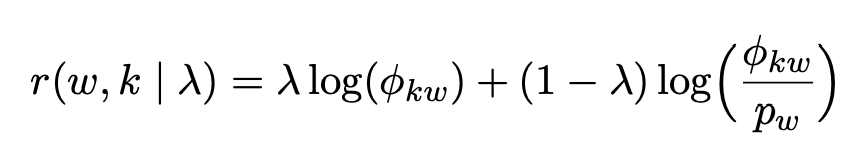
    - Setting lambda = 1 results in the familiar ranking of terms in decreasing order of their topic-specific probability, and setting lambda = 0 ranks terms solely by their lift.
    

[Reference](https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)

### LDA k = 5 NER w/o abstract

In [44]:
ldagensim = convertldaMalletToldaGen(lda_5)
vis_data = gensimvis.prepare(ldagensim, corpus_ner, lda_5.id2word, sort_topics=False)
pyLDAvis.display(vis_data)

/Users/duxiang/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


### LDA k = 5 NER w/ abstract

In [45]:
ldagensim = convertldaMalletToldaGen(lda_5_abs)
vis_data = gensimvis.prepare(ldagensim, corpus_ner_abs, lda_5_abs.id2word, sort_topics=False)
pyLDAvis.display(vis_data)

### LDA k = 5 no NER w/o abstract

In [46]:
ldagensim = convertldaMalletToldaGen(lda_5_noner)
vis_data = gensimvis.prepare(ldagensim, corpus_no_ner, lda_5_noner.id2word, sort_topics=False)
pyLDAvis.display(vis_data)

### LDA k = 5 no NER w/ abstract

In [ ]:
ldagensim = convertldaMalletToldaGen(lda_5_noner_abs)
vis_data = gensimvis.prepare(ldagensim, corpus_no_ner_abs, lda_5_noner_abs.id2word, sort_topics=False)
pyLDAvis.display(vis_data)